#### FastAI UNet - Training
- Reference: https://www.youtube.com/watch?v=DKzL4zumFi8
- https://walkwithfastai.com/Segmentation

In [1]:
import os
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES="4,5"
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"]="4,5"

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES="4,5"


In [2]:
import numpy as np
from pathlib import Path

from fastai.vision.all import *

cwd = Path.cwd()
path = os.path.join(cwd, "battus10", "training_images")
path

'/home/rahul/workspace/vision/eeb/mothra/data/battus10/training_images'

In [3]:
codes = np.loadtxt(os.path.join(path, "codes.txt"), dtype='str')
files = get_image_files(os.path.join(path, "images"))
print("Total Images:", len(files), " \t Sample: ", files[0])
print("Codes: ", codes)

Total Images: 8  	 Sample:  /home/rahul/workspace/vision/eeb/mothra/data/battus10/training_images/images/IMG_1763.JPG
Codes:  ['background' 'lepidopteran' 'tags' 'ruler']


<Axes: >

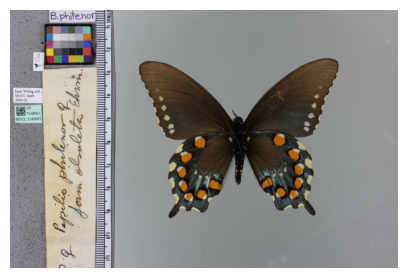

In [4]:
img = PILImage.create(files[1])
img.show(figsize=(5,5))

<Axes: >

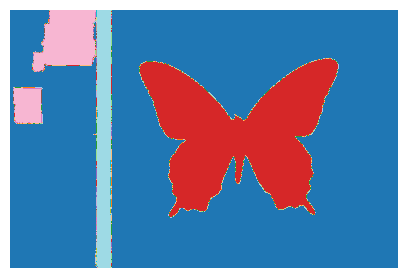

In [5]:
def label_func(image):
    """Function used to label images while training. Required by fastai."""
    return os.path.join(path, "labels", f"{image.stem}.png")

msk = PILMask.create(label_func(files[1]))
msk.show(figsize=(5,5), alpha=1)

In [6]:
name2id = {v:k for k,v in enumerate(codes)}
print("Unique labels:",np.unique(msk), "\n", name2id)

Unique labels: [0 1 2 3] 
 {'background': 0, 'lepidopteran': 1, 'tags': 2, 'ruler': 3}


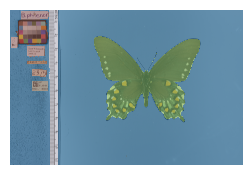

In [7]:
dls = SegmentationDataLoaders.from_label_func(path, bs=1, fnames=files, label_func=label_func, codes=codes, num_workers=1)
dls.show_batch()

## Train

In [8]:
# Now, loading the model 
learn = unet_learner(dls, vgg19,  pretrained=True) # self_attention=True, weights="./init/segmentation_test-4classes.pkl"

/home/rahul/miniconda/envs/mothra/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/rahul/miniconda/envs/mothra/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG19_Weights.IMAGENET1K_V1`. You can also use `weights=VGG19_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [9]:
# Train for 20 epochs
learn.fine_tune(20)

epoch,train_loss,valid_loss,time


OutOfMemoryError: CUDA out of memory. Tried to allocate 34.37 GiB. GPU 0 has a total capacity of 47.54 GiB of which 10.66 GiB is free. Including non-PyTorch memory, this process has 36.88 GiB memory in use. Of the allocated memory 35.01 GiB is allocated by PyTorch, and 455.81 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [10]:
# Model export using pickle protocol - https://docs.fast.ai/learner.html#learner
learn.export('battus10_segmentation_test-4classes-resnet18-b2-e50.pkl')

/home/rahul/miniconda/envs/eeb/lib/python3.8/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


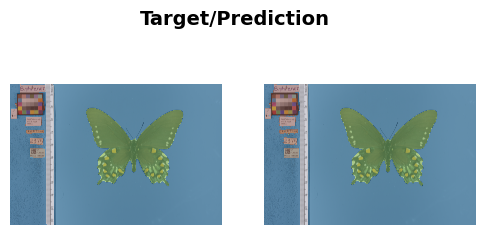

In [11]:
learn.show_results(max_n=2)